# 1st Main Kernel - Start Here : A Gentle Introduction

In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder

# File system management
import os

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
print(os.listdir())

['.ipynb_checkpoints', 'application_test.csv', 'application_train.csv', 'bureau.csv', 'bureau_balance.csv', 'credit_card_balance.csv', 'HomeCredit_columns_description.csv', 'installments_payments.csv', 'kaggle_study_12_9.ipynb', 'POS_CASH_balance.csv', 'previous_application.csv', 'sample_submission.csv', 'Untitled.ipynb']


In [3]:
# Training Data
app_train = pd.read_csv('application_train.csv')

In [4]:
print('Training data shape', app_train.shape)
app_train.head()

Training data shape (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
app_test = pd.read_csv('application_test.csv')
print('Testing data shape : ', app_test.shape)
app_test.head()

Testing data shape :  (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


### 데이터셋의 특정 칼럼에서 값(value)의 종류, 그 값이 몇개가 있는지 요약통계 함수 : value_counts()
### value_counts() 함수가 테이블로 결과를 보여준다면, 그래프 중 히스토그램을 이용하여 그 값이 몇개가 있는지 나타내주는 함수 : df['column'].plot.hist()

In [6]:
app_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

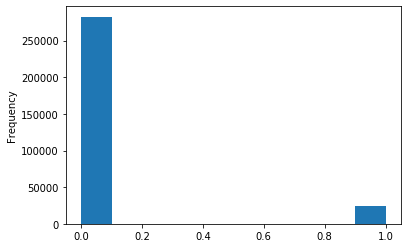

In [7]:
app_train['TARGET'].plot.hist();

### 결측치 테이블 만들기
#### 다섯번째 mis_val_table_ren_columns 변수에서 결측치 수가 0인 칼럼은 제외하고 sort해 주는 걸 알 수 있다.
#### columns.round(n) : 소수점 아래 n번째까지 나타내며 n+1번째에서 반올림하게 된다.  

In [8]:
# Function to calculate missing value by column# Funct
def missing_values_table(df):
    # total missing value
    mis_val = df.isnull().sum()
    
    # percentage of missing value
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    
    # make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis = 1)
    
    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    
    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending = False).round(1)
    
    # print some summary information
    print('Your selected dataframe has ' + str(df.shape[1]) + ' columns.\n'
         'There are ' + str(mis_val_table_ren_columns.shape[0]) + 
         ' columns that have missing values')
    
    return mis_val_table_ren_columns

In [9]:
missing_values = missing_values_table(app_train)
missing_values

Your selected dataframe has 122 columns.
There are 67 columns that have missing values


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


In [10]:
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [11]:
# Number of unique classes in each object column of Training data
app_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [12]:
# Number of unique classes in each object column of Testing data
app_test.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    2
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               7
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             5
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

### unique()와 nunique()의 차이
#### column.unique()는 column의 유일한 값들을 array 형태로 나타내는 함수고 column.nunique()는 column의 유일한 값들의 개수를 int 형태로 나타내는 함수다.
#### 둘의 가장 큰 차이점은 unique() 함수는 NaN을 포함하여 보여주는 반면에, nuique() 함수는 NaN을 제외한 유일한 값들의 개수를 보여주는 것이다.
#### 아래의 label encoder와 one-hot encoder 셀에서 9번째 줄을 보면 nunique()함수를 사용하지 않고 len(list(app_train[col].unique())) 함수를 사용하는 것을 알 수 있다.
#### 이는 category 형 변수 16개 중 마지막 EMERGENCYSTATE_MODE 변수가 NaN을 포함하여 (no, NaN, yes)형태의 값을 갖고 있는데 위에서 nunique()함수에서는 NaN이 제외되어 2가 계산되었다.
#### 하지만 11번째 줄에서 le.fit(app_train[col]) 명령어를 보면 le.fit 함수는 string이나 numeric 형 변수만 label encoding이 가능하기 때문에 (no, NaN, yes) 값을 가지는 EMERGENCYSTATE_MODE 변수는 label encoding이 불가능하다. 따라서 이 변수를 걸러내기 위해 nunique() 대신 unique() 함수를 사용해 len()함수를 이용한 길이 계산을 사용한 것이다.

In [13]:
len(list(app_train['EMERGENCYSTATE_MODE'].unique()))

3

In [14]:
app_train['EMERGENCYSTATE_MODE'].nunique()

2

### 만약 unique() 함수처럼 쓰고 싶다면 nunique(dropna = False)로 옵션을 주어 사용 가능하다.

In [15]:
app_train['EMERGENCYSTATE_MODE'].nunique(dropna = False)

3

In [16]:
print(len(list(app_train['EMERGENCYSTATE_MODE'].unique())))
print(app_train['EMERGENCYSTATE_MODE'].nunique())
print(app_train['EMERGENCYSTATE_MODE'].nunique(dropna = False))

3
2
3


## Label Encoder와 One-hot Encoder
#### 유일한 값 개수 2개 이하일 때는 Label Encoder를 사용, 3개 이상일 땐 One-hot Encoder를 사용했다.
#### 위 저자는 3개 이상의 범주형 변수인 경우 one-hot encoding이 더 안전한 방법이라고 소개한다. 그 이유는 label encoding은 0부터 n까지의 숫자로 라벨을 정하게 되는데 사실 라벨들 간의 간격은 모두 동일하고 모두 랜덤이기 때문에 모델 생성시 숫자 크기로 인한 차이가 발생할 수 있기 때문이다. 그러므로 모두 0과 1로 표기하는 one-hot encoding이 더 안전한 방법이라 소개하고 있다.
#### 그래서 유일한 값 개수가 2개 이하일 때는 0과 1만을 사용하므로 label encoder를 사용해도 무방하기 때문에 one-hot encoding으로 불필요하게 column을 늘릴 필요가 없어진다. 하지만 그 외 3개 이상의 값을 가지는 변수는 one-hot encoding으로 안전하게 범주형 변수를 구분해주는 것이 좋다.

In [17]:
# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique caategories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col])
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded. ' % le_count)

3 columns were label encoded. 


## One-hot Encoder의 get_dummies() 함수의 원리
#### 위에서 정리했듯이 유일한 값 개수가 3개 이상인 변수는 one-hot encoder로 처리한다. one-hot encoder를 실행해주는 Pandas 내장 함수 get_dummies()를 이용하게 되는데 이 원리에 대해 정리하면 다음과 같다.
#### 먼저 이 함수의 대상은 categorical 변수 13개로 앞서 이미 binary int 타입으로 변환된 3개의 categorical 변수는 대상이 아니다. 그 다음 유일한 값 개수 만큼 column을 생성하게 되는데 이 때 원래 있던 column은 삭제된다. 결과적으로 app_train 데이터에서 122에서 243개의 column을 갖게 되는 원리를 수식으로 정리하면 다음과 같다.
#### 243 = 122 + (13개 categorical 변수의 유일한 값 개수의 합) - (기존 변수들 개수)
####        = 122 + 134 - 13

In [18]:
# one-hot encoding of categorical variables
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

print('Training Features shape : ', app_train.shape)
print('Testing Features shape : ', app_test.shape)

Training Features shape :  (307511, 243)
Testing Features shape :  (48744, 239)


In [19]:
app_train.iloc[:,150]

0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18        0
19        0
20        0
21        0
22        0
23        0
24        0
25        0
26        0
27        0
28        0
29        0
         ..
307481    0
307482    0
307483    0
307484    0
307485    0
307486    0
307487    0
307488    0
307489    0
307490    0
307491    0
307492    0
307493    0
307494    0
307495    1
307496    0
307497    0
307498    0
307499    0
307500    0
307501    0
307502    0
307503    0
307504    0
307505    0
307506    0
307507    0
307508    0
307509    0
307510    0
Name: OCCUPATION_TYPE_High skill tech staff, Length: 307511, dtype: uint8

## Aligning Training and Testing data
#### aligning : 두 개의 데이터프레임(or Series 자료형)을 대상으로 네가지 join(left, right, inner, outer - default = outer) 방법을 사용해 column들을 조정해 맞추는 것.  
#### axis = n; n번째 축(행)을 기준으로 하며, align을 사용할 때는 axis = 1을 준다고 한다.(이유는 아직 잘 모르겠습니다)  
#### ailgn을 하게 되면 두 데이터프레임은 지정한 join 방식에 따라 column을 갖게 된다.
## 왜 one-hot encoding 후의  training data와 testing data의 칼럼 개수가 다른가?
####  training data와 testing data에서 변수는 같으나 변수마다 유일한 값의 개수가 다른게 3개 있는데 각각 하나씩 부족하기 때문에 testing data에서 총합 3개가 적게 나온다.

In [20]:
train_labels = app_train['TARGET']

# Align the training and testing data, keep only columns present in both dataframes
app_train, app_test = app_train.align(app_test, join = 'inner', axis = 1)

# Add the target back in
app_train['TARGET'] = train_labels

print('Training Features shape : ', app_train.shape)
print('Testing Features shape : ', app_test.shape)

Training Features shape :  (307511, 240)
Testing Features shape :  (48744, 239)


In [21]:
app_train['DAYS_BIRTH'].describe()

count    307511.000000
mean     -16036.995067
std        4363.988632
min      -25229.000000
25%      -19682.000000
50%      -15750.000000
75%      -12413.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64

### training 데이터의 'DAYS_EMPLOYED' 칼럼에서 365243의 값을 가지는 이상치(anomaly or outlier)가 55374개 존재한다.


{'whiskers': [<matplotlib.lines.Line2D at 0x1b48e4e1f60>,
 'caps': [<matplotlib.lines.Line2D at 0x1b48e49f940>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b48e4e1e10>],
 'medians': [<matplotlib.lines.Line2D at 0x1b48e49ffd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b48e49fd68>],
 'means': []}

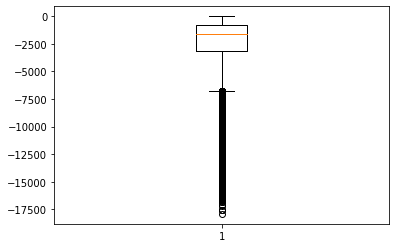

In [22]:
plt.boxplot(app_train['DAYS_EMPLOYED'][app_train['DAYS_EMPLOYED'] != 365243])

In [23]:
# find the number of outliers in 'DAYS_EMPLOYED' column on training data
print('The number of outliers which have "365243" in the DAYS_EMPLOYED column in Training data is ', app_train['DAYS_EMPLOYED'][app_train['DAYS_EMPLOYED'] == 365243].count())

# find the number of outliers in 'DAYS_EMPLOYED' column on testing data
print('The number of outliers which have "365243" in the DAYS_EMPLOYED column in Testing data is ', app_test['DAYS_EMPLOYED'][app_test['DAYS_EMPLOYED'] == 365243].count())

The number of outliers which have "365243" in the DAYS_EMPLOYED column in Training data is  55374
The number of outliers which have "365243" in the DAYS_EMPLOYED column in Testing data is  9274


In [24]:
anom = app_train[app_train['DAYS_EMPLOYED'] == 365243]
non_anom = app_train[app_train['DAYS_EMPLOYED'] != 365243]
print('The non-anomalies default on %0.2f%% of loans' % (100 * non_anom['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100 * anom['TARGET'].mean()))
print('There are %d anomalous days of employment' % len(anom))

The non-anomalies default on 8.66% of loans
The anomalies default on 5.40% of loans
There are 55374 anomalous days of employment


Text(0.5, 0, 'Days Employment')

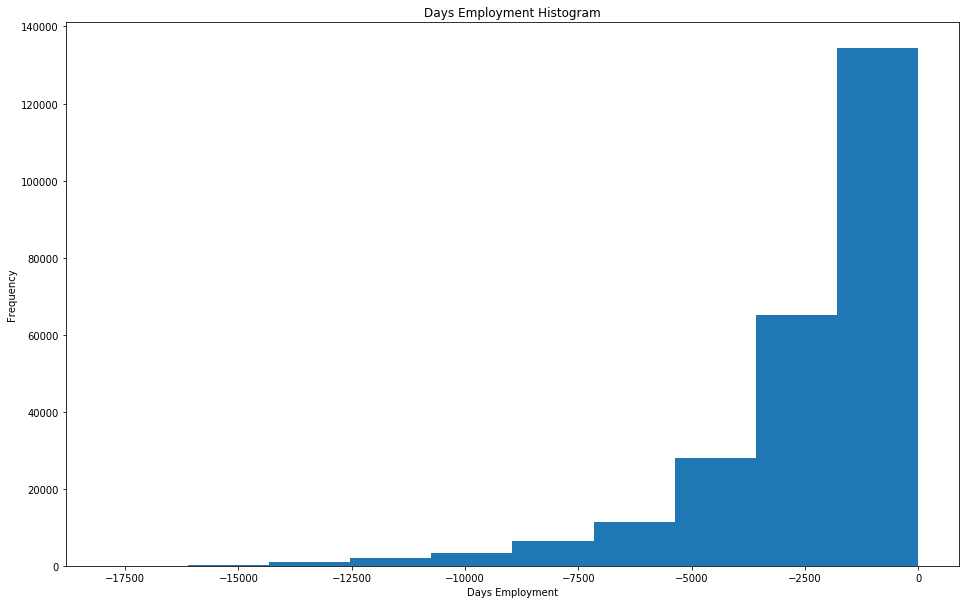

In [25]:
# Create an anomalous flag column
app_train['DAYS_EMPLOYED_ANOM'] = app_train['DAYS_EMPLOYED'] == 365243

# Replace the anomalous values with nan
app_train['DAYS_EMPLOYED'].replace({365243 : np.nan}, inplace = True)

plt.figure(figsize = (16,10))
app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram')
plt.xlabel('Days Employment')

In [26]:
app_test['DAYS_EMPLOYED_ANOM'] = app_test['DAYS_EMPLOYED'] == 365243
app_test['DAYS_EMPLOYED'].replace({365243 : np.nan}, inplace = True)

print('There are %d anomalies in the test data out of %d entries' % (app_test['DAYS_EMPLOYED_ANOM'].sum(), len(app_test)))

There are 9274 anomalies in the test data out of 48744 entries


In [27]:
# Find correlations with the target and sort
correlations = app_train.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_EMPLOYED                                        0.074958
DAYS_BIRTH                                           0.078239
TARGET                                               1.000000
Name: TARGET, dtype: float64

Most Negati

In [28]:
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_train['DAYS_BIRTH'].corr(app_train['TARGET'])

-0.07823930830982737

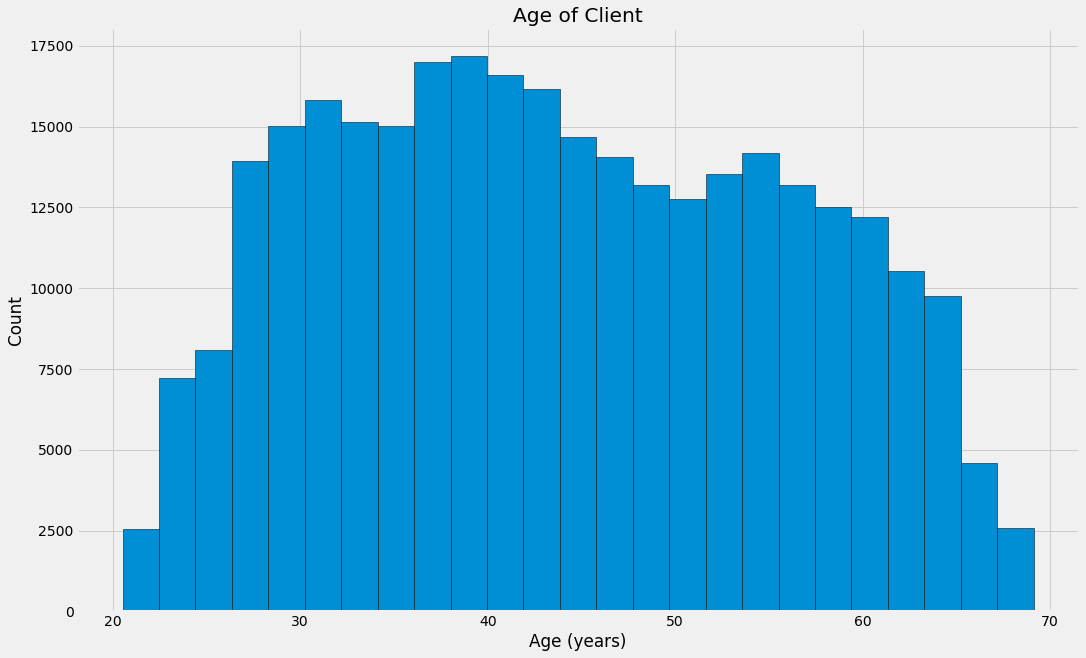

In [29]:
# Set the style of plots
plt.style.use('fivethirtyeight')
plt.figure(figsize = (16,10))

# Plot the distribution of ages in years
plt.hist(app_train['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25)
plt.title('Age of Client');plt.xlabel('Age (years)');plt.ylabel('Count');

### kde (kernel density estimator) plot : 커널 밀도 추정 그래프. 커널 밀도 함수 곡선을 그려주는 plot

Text(0.5, 1.0, 'Distribution of Ages')

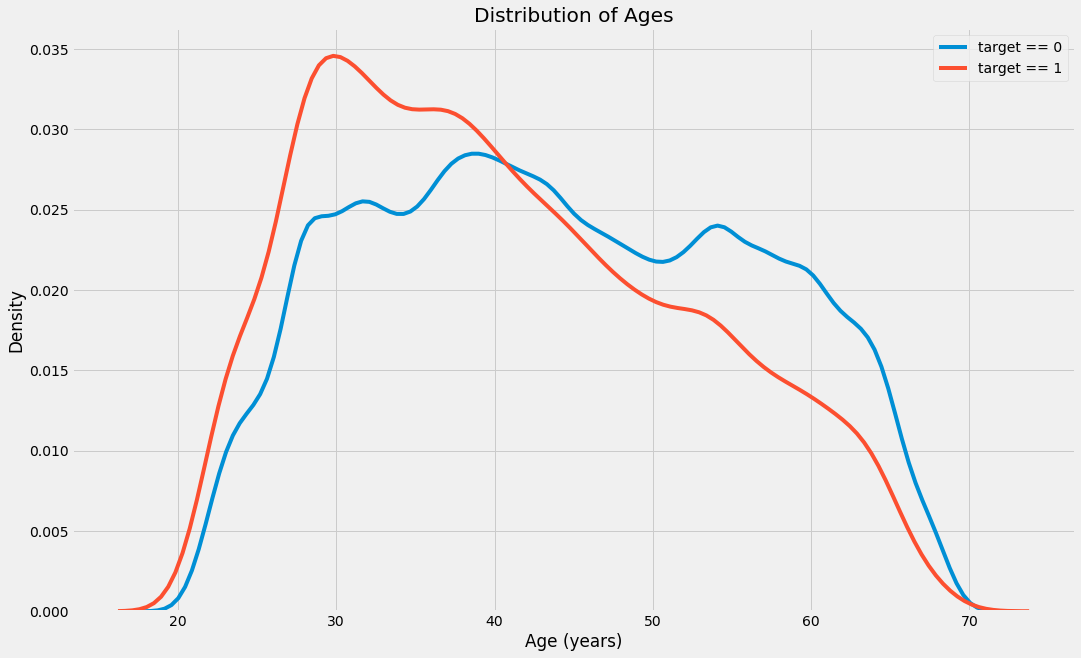

In [30]:
plt.figure(figsize = (16,10))

# KDE plot of loans that were repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'target == 0')

#KDE plot of loans which were not repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1')

# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages')

## pandas cut(column, bins = ...)
### 괄호안의 column에 대하여 bins에서 정의한 계급 구간으로 나눌 때 사용하는 함수. 

In [31]:
# Age information into a separate dataframe
age_data = app_train[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365

# Bin the age data
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_data.head(20)

,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"
5,0,16941,46.413699,"(45.0, 50.0]"
6,0,13778,37.747945,"(35.0, 40.0]"
7,0,18850,51.643836,"(50.0, 55.0]"
8,0,20099,55.065753,"(55.0, 60.0]"
9,0,14469,39.641096,"(35.0, 40.0]"


In [32]:
# Group by the bin and calculate averages
age_groups = age_data.groupby(['YEARS_BINNED']).mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.123036,8532.795625,23.377522
"(25.0, 30.0]",0.111436,10155.219250,27.822518
"(30.0, 35.0]",0.102814,11854.848377,32.479037
"(35.0, 40.0]",0.089414,13707.908253,37.555913
"(40.0, 45.0]",0.078491,15497.661233,42.459346
"(45.0, 50.0]",0.074171,17323.900441,47.462741
"(50.0, 55.0]",0.066968,19196.494791,52.593136
"(55.0, 60.0]",0.055314,20984.262742,57.491131
"(60.0, 65.0]",0.052737,22780.547460,62.412459


Text(0.5, 1.0, 'Failure to Repay by Age Group')

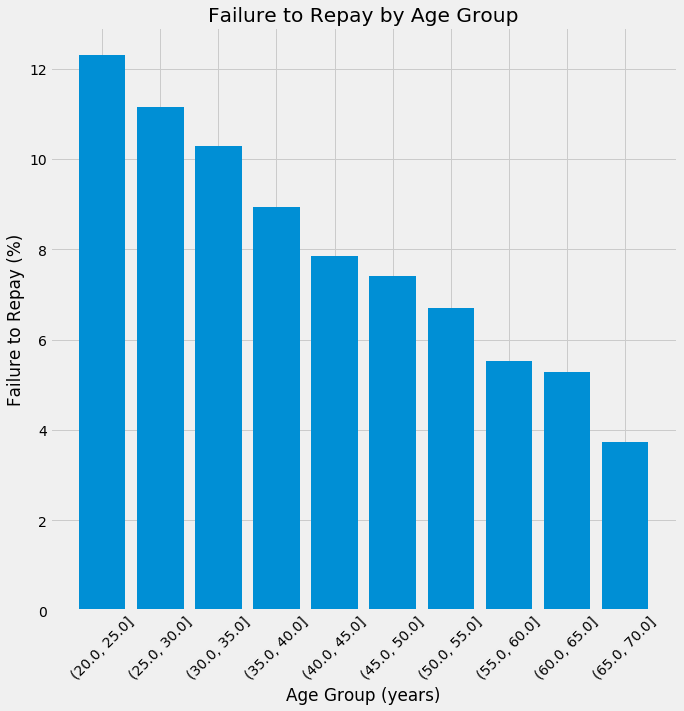

In [33]:
plt.figure(figsize = (10,10))

# Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

# Plot labeling
plt.xticks(rotation = 45); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)');
plt.title('Failure to Repay by Age Group')

In [34]:
# Extract the EXT_SOURCE variables and show correlations
ext_data = app_train[['TARGET','EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.155317,-0.160472,-0.178919,-0.078239
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846,0.600610
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167,0.091996
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000,0.205478
DAYS_BIRTH,-0.078239,0.600610,0.091996,0.205478,1.000000


Text(0.5, 1, 'Correlation heatmap')

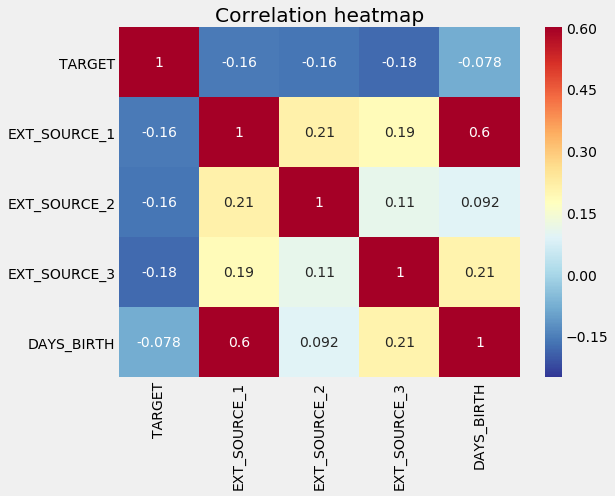

In [35]:
plt.figure(figsize = (8,6))

# Heatmap of correlations
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation heatmap')

### for문의 enumerate 반복문
#### for i, source in enumerate(['col1', 'col2', 'col3', ...... , 'coln']): 에서 enumerate 반복문은 컬렉션의 인덱스와 함께 내용도 반환 가능. 위와 같은 경우 i와 source에 들어가게 되는 값은 for문이 진행됨에 따라 다음과 같다.
#### 1 -> (i, source) = (1, col1)
#### 2 -> (i, source) = (2, col2)
#### 3 -> (i, source) = (3, col3)
#### 4 -> (i, source) = (4, col4)
#### .
#### .
#### . 
#### n -> (i, source) = (n, coln)

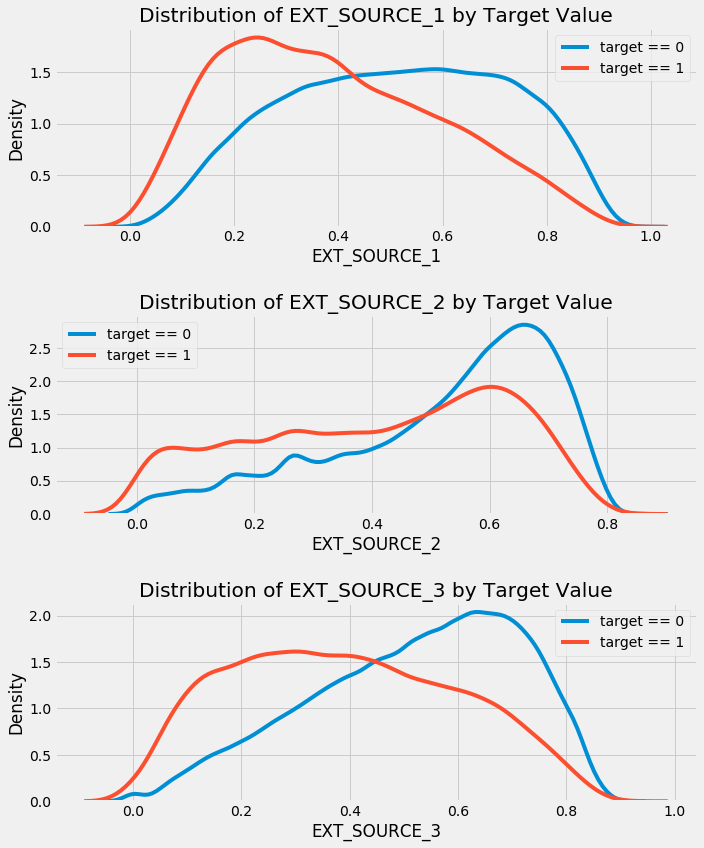

In [36]:
plt.figure(figsize = (10,12))

# iterate through the sources
for i, source in enumerate(['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3']):
    
    # create a new subplot for each source
    plt.subplot(3, 1, i+1)
    
    # plot repaid loans
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, source], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, source], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2)

Text(0.5, 1.05, 'Ext Source and Age Features Pairs Plot')

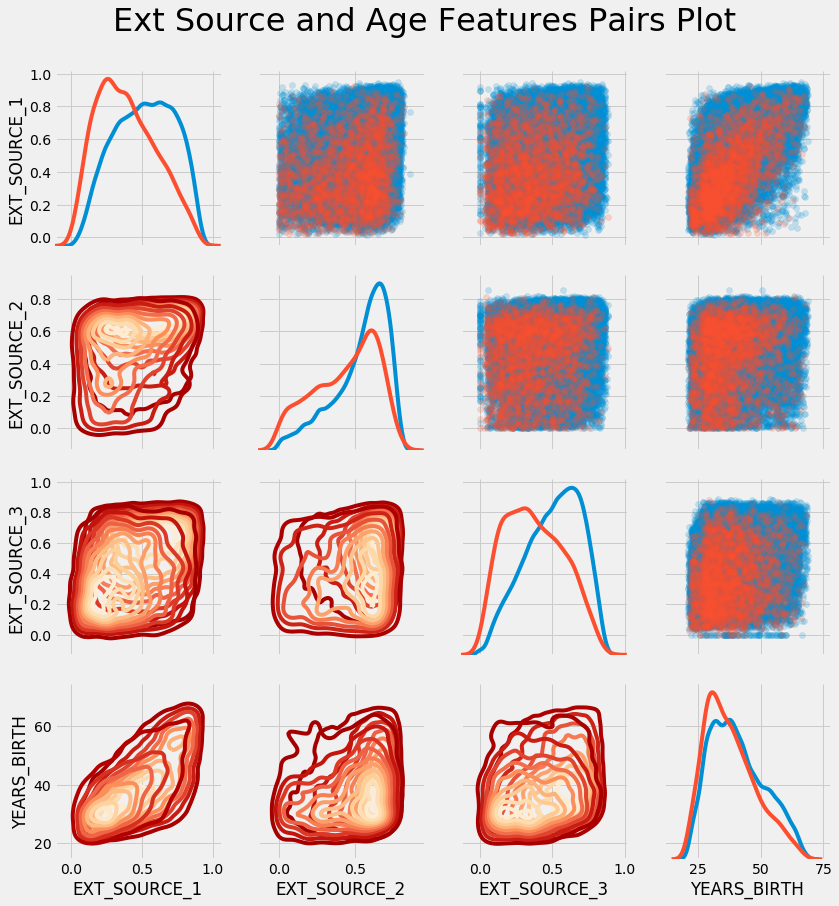

In [37]:
# Copy the data for plotting
plot_data = ext_data.drop(columns = ['DAYS_BIRTH']).copy()

# Add in the age of the client in years
plot_data['YEARS_BIRTH'] = age_data['YEARS_BIRTH']

# Drop na values and limit to first 100000 rows
plot_data = plot_data.dropna().loc[:100000, :]

# Function to calculate correlation coefficient between two columns
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x,y)[0][1]
    ax.annotate("r = {:.2f}".format(r),
               xy = (.2, .8), xycoords = ax.transAxes,
               size = 20)

# Create the pairgrid object
grid = sns.PairGrid(data = plot_data, size = 3, diag_sharey = False,
                   hue = 'TARGET',
                   vars = [x for x in list(plot_data.columns) if x != 'TARGET'])

# Upper is a scatter plot
grid.map_upper(plt.scatter, alpha = 0.2)

# Diagonal is a histogram
grid.map_diag(sns.kdeplot)

# Bottom is density plot
grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r);

plt.suptitle('Ext Source and Age Features Pairs Plot', size = 32, y = 1.05)

## polynomial_features()
### 다항차수 변환, 교호작용 변수 생성
#### 기존의 개인 변수들로는 찾을 수 없는 타겟 변수와의 상관관계를 밝혀내기 위한 다항차수 변환 과정이다. 일반적으로 변수들의 곱, 변수 간의 곱 등으로 새로운 변수를 만들어 사용하게 된다. 그 예를 들면
#### 예시) 변수 a, b의 2 degree 의 features는 다음과 같다
#### [1, a, b, a^2, a * b, b^2]
#### 위처럼 변수 간, 변수의 곱으로 새로운 features를 생성하는 방법이 polynomial_features()이다.
## n개의 변수 중 degree = r인 polynomial_features의 개수 구하는 공식은 다음과 같다
### - 중복을 허용한 복원추출로 n개의 변수중 0, 1 , ... , r개를 뽑는 조합의 경우의 수는 nH0 + nH1 + ... + nHr = (n+0-1)C0 + (n+1-1)C1 + ... + (n+r-1)Cr

In [38]:
# Make a new dataframe for polynomial features
# polynomial : 다항식
poly_features = app_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'TARGET']]
poly_features_test = app_test[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]

# imputer for handling missing values
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy = 'median')

poly_target = poly_features['TARGET']

poly_features = poly_features.drop(columns = ['TARGET'])

# Need to impute missing values
poly_features = imputer.fit_transform(poly_features)
poly_features_test = imputer.fit_transform(poly_features_test)

from sklearn.preprocessing import PolynomialFeatures

# Create the polynomial object with specified degree
poly_transformer = PolynomialFeatures(degree = 3)

## 여기서는 4개의 변수 중 degree = 3의 polynomial_features를 구하고 있으므로 변수 총 개수는
### 4H0 + 4H1 + 4H2 + 4H3 = 3C0 + 4C1 + 5C2 + 6C3 = 35

In [39]:
# Train the polynomial features
poly_transformer.fit(poly_features)

# Transform the features
poly_features = poly_transformer.transform(poly_features)
poly_features_test = poly_transformer.transform(poly_features_test)
print('Polynomial Features shape: ', poly_features.shape)

Polynomial Features shape:  (307511, 35)


In [45]:
poly_transformer.get_feature_names(input_features = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH'])[:30]

['1',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DAYS_BIRTH',
 'EXT_SOURCE_1^2',
 'EXT_SOURCE_1 EXT_SOURCE_2',
 'EXT_SOURCE_1 EXT_SOURCE_3',
 'EXT_SOURCE_1 DAYS_BIRTH',
 'EXT_SOURCE_2^2',
 'EXT_SOURCE_2 EXT_SOURCE_3',
 'EXT_SOURCE_2 DAYS_BIRTH',
 'EXT_SOURCE_3^2',
 'EXT_SOURCE_3 DAYS_BIRTH',
 'DAYS_BIRTH^2',
 'EXT_SOURCE_1^3',
 'EXT_SOURCE_1^2 EXT_SOURCE_2',
 'EXT_SOURCE_1^2 EXT_SOURCE_3',
 'EXT_SOURCE_1^2 DAYS_BIRTH',
 'EXT_SOURCE_1 EXT_SOURCE_2^2',
 'EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3',
 'EXT_SOURCE_1 EXT_SOURCE_2 DAYS_BIRTH',
 'EXT_SOURCE_1 EXT_SOURCE_3^2',
 'EXT_SOURCE_1 EXT_SOURCE_3 DAYS_BIRTH',
 'EXT_SOURCE_1 DAYS_BIRTH^2',
 'EXT_SOURCE_2^3',
 'EXT_SOURCE_2^2 EXT_SOURCE_3',
 'EXT_SOURCE_2^2 DAYS_BIRTH',
 'EXT_SOURCE_2 EXT_SOURCE_3^2',
 'EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH']

In [47]:
# Create a dataframe of the features
poly_features = pd.DataFrame(poly_features, columns = poly_transformer.get_feature_names(['EXT_SOURCE_1','EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']))

# Add in the target
poly_features['TARGET'] = poly_target

# Find the correlations with the target
poly_corrs = poly_features.corr()['TARGET'].sort_values()

# Display most negative and most positive
print(poly_corrs.head(10))
print(poly_corrs.tail(10))

EXT_SOURCE_2 EXT_SOURCE_3                -0.193939
EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3   -0.189605
EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH     -0.181283
EXT_SOURCE_2^2 EXT_SOURCE_3              -0.176428
EXT_SOURCE_2 EXT_SOURCE_3^2              -0.172282
EXT_SOURCE_1 EXT_SOURCE_2                -0.166625
EXT_SOURCE_1 EXT_SOURCE_3                -0.164065
EXT_SOURCE_2                             -0.160295
EXT_SOURCE_2 DAYS_BIRTH                  -0.156873
EXT_SOURCE_1 EXT_SOURCE_2^2              -0.156867
Name: TARGET, dtype: float64
EXT_SOURCE_1                -0.098887
EXT_SOURCE_1^2 DAYS_BIRTH   -0.097507
EXT_SOURCE_1 DAYS_BIRTH^2   -0.094913
EXT_SOURCE_1^2              -0.091034
EXT_SOURCE_1^3              -0.083005
DAYS_BIRTH                  -0.078239
DAYS_BIRTH^2                -0.076672
DAYS_BIRTH^3                -0.074273
TARGET                       1.000000
1                                 NaN
Name: TARGET, dtype: float64


In [51]:
# Put test features into dataframe
poly_features_test = pd.DataFrame(poly_features_test, columns = poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', 
                                                                                'EXT_SOURCE_3', 'DAYS_BIRTH']))
# Merge polynomial features into training dataframe
poly_features['SK_ID_CURR'] = app_train['SK_ID_CURR']
app_train_poly = app_train.merge(poly_features, on = 'SK_ID_CURR', how = 'left')

# Merge polynomial features into testing dataframe
poly_features_test['SK_ID_CURR'] = app_test['SK_ID_CURR']
app_test_poly = app_test.merge(poly_features_test, on = 'SK_ID_CURR', how = 'left')


In [52]:
app_train_poly.shape

(307511, 277)

In [53]:
app_test_poly.shape

(48744, 275)

## polynomial_features를 합친 training, testing 데이터를 align 해줌
### 앞서 align 진행 시 target 변수를 따로 빼고 align후 training 데이터에 넣어줬는데 이번에는 그 과정이 좀 뒤에 따로 나옴. 이유가 뭔지는 아직 잘 모르겠다.

In [54]:
# Align the dataframe
app_train_poly, app_test_poly = app_train_poly.align(app_test_poly, join = 'inner', axis = 1)

# Print out the new shapes
print('Training data with polynomial features shape : ', app_train_poly.shape)
print('Testing data with polynomial features shape : ', app_test_poly.shape)

Training data with polynomial features shape :  (307511, 275)
Testing data with polynomial features shape :  (48744, 275)


In [55]:
app_train_domain = app_train.copy()
app_test_domain = app_test.copy()

app_train_domain['CREDIT_INCOME_PERCENT'] = app_train_domain['AMT_CREDIT'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['ANNUITY_INCOME_PERCENT'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_INCOME_TOTAL']

app_train_domain['CREDIT_TERM'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_CREDIT']
app_train_domain['DAYS_EMPLOYED_PERCENT'] = app_train_domain['DAYS_EMPLOYED'] / app_train_domain['DAYS_BIRTH']


In [56]:
app_test_domain['CREDIT_INCOME_PERCENT'] = app_test_domain['AMT_CREDIT'] / app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['ANNUITY_INCOME_PERCENT'] = app_test_domain['AMT_ANNUITY'] / app_test_domain['AMT_INCOME_TOTAL']

app_test_domain['CREDIT_TERM'] = app_test_domain['AMT_ANNUITY'] / app_test_domain['AMT_CREDIT']
app_test_domain['DAYS_EMPLOYED_PERCENT'] = app_test_domain['DAYS_EMPLOYED'] / app_test_domain['DAYS_BIRTH']

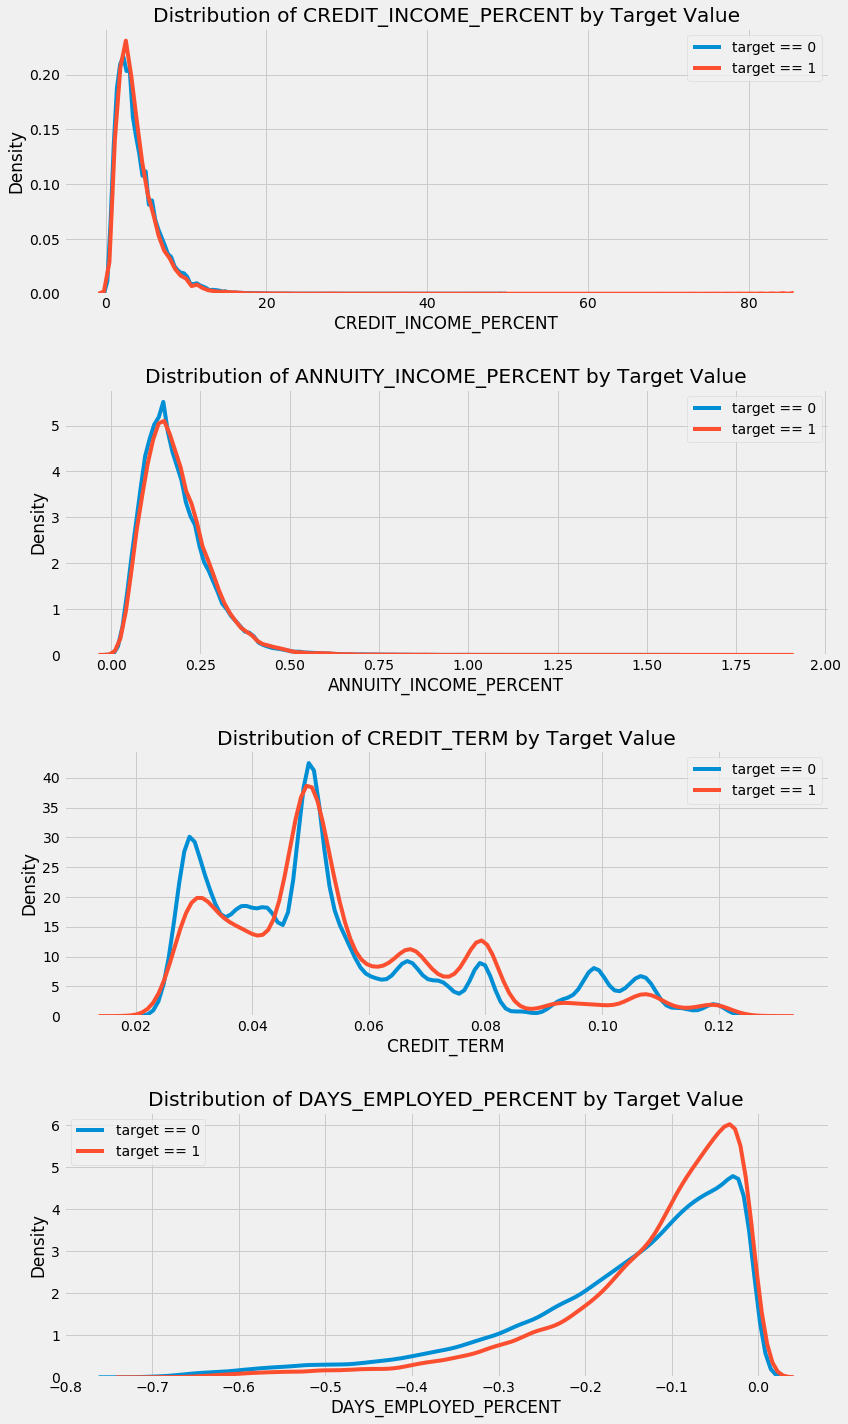

In [57]:
plt.figure(figsize = (12,20))

# iterate through the new features
for i, feature in enumerate(['CREDIT_INCOME_PERCENT', 'ANNUITY_INCOME_PERCENT', 'CREDIT_TERM', 'DAYS_EMPLOYED_PERCENT']):
    
    # create a new subplot for each source
    plt.subplot(4, 1, i+1)
    
    # plot repaid loans
    sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET'] == 0, feature], label = 'target == 0')
    
    # plot loans that were not repaid
    sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET'] == 1, feature], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % feature)
    plt.xlabel('%s' % feature); plt.ylabel('Density')
    
plt.tight_layout(h_pad = 2.5)

In [58]:
from sklearn.preprocessing import MinMaxScaler, Imputer

# Drop the target from the training data
if 'TARGET' in app_train:
    train = app_train.drop(columns = ['TARGET'])
else:
    train = app_train.copy()
    
# Feature names
features = list(train.columns)

# Copy of the testing data
test = app_test.copy()

# Median imputation of missing values
imputer = Imputer(strategy = 'median')

# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range = (0,1))

# Fit on the training data
imputer.fit(train)

# Transform both training and testing data
train = imputer.transform(train)
test = imputer.transform(app_test)

# Repeat with the scaler
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

print('Training data shape : ', train.shape)
print('Testing data shape : ', test.shape)

Training data shape :  (307511, 240)
Testing data shape :  (48744, 240)


# 1st FOLLOW-UP kernel - Manual Feature Engineering Part One 

In [40]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Suppress warnings from pandas
import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')

## 데이터 불러오기

In [41]:
bureau = pd.read_csv('bureau.csv')
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [42]:
bureau.groupby(['CREDIT_ACTIVE'])['CREDIT_ACTIVE'].count()

CREDIT_ACTIVE
Active       630607
Bad debt         21
Closed      1079273
Sold           6527
Name: CREDIT_ACTIVE, dtype: int64

In [43]:
bureau.groupby(['CREDIT_CURRENCY'])['CREDIT_CURRENCY'].count()

CREDIT_CURRENCY
currency 1    1715020
currency 2       1224
currency 3        174
currency 4         10
Name: CREDIT_CURRENCY, dtype: int64